In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
df = pd.DataFrame(index=range(50))

<IPython.core.display.Javascript object>

In [4]:
# Set odd days to +3%
df.loc[df.index % 2 == 1, "underlying_return"] = 0.03

<IPython.core.display.Javascript object>

In [5]:
# Set even days to -2.913%
df.loc[df.index % 2 == 0, "underlying_return"] = -0.02913

<IPython.core.display.Javascript object>

In [6]:
# Start at zero
df.iloc[0].loc["underlying_return"] = 0
df.head(5)

,underlying_return
0,0.00000
1,0.03000
2,-0.02913
3,0.03000
4,-0.02913


<IPython.core.display.Javascript object>

In [7]:
# Calculate cumulative series
df["underlying_price"] = (df["underlying_return"] + 1).cumprod()
df.head(5)

,underlying_return,underlying_price
0,0.00000,1.000000
1,0.03000,1.030000
2,-0.02913,0.999996
3,0.03000,1.029996
4,-0.02913,0.999992


<IPython.core.display.Javascript object>

In [8]:
# Inverse ETF
df["short_return"] = df["underlying_return"] * -1
df["double_short_return"] = df["underlying_return"] * -2
df.head(5)

,underlying_return,underlying_price,short_return,double_short_return
0,0.00000,1.000000,-0.00000,-0.00000
1,0.03000,1.030000,-0.03000,-0.06000
2,-0.02913,0.999996,0.02913,0.05826
3,0.03000,1.029996,-0.03000,-0.06000
4,-0.02913,0.999992,0.02913,0.05826


<IPython.core.display.Javascript object>

In [9]:
# Double Inverse
df["short_price"] = (df["short_return"] + 1).cumprod()
df["double_short_price"] = (df["double_short_return"] + 1).cumprod()
df.head(5)

,underlying_return,underlying_price,short_return,double_short_return,short_price,double_short_price
0,0.00000,1.000000,-0.00000,-0.00000,1.000000,1.000000
1,0.03000,1.030000,-0.03000,-0.06000,0.970000,0.940000
2,-0.02913,0.999996,0.02913,0.05826,0.998256,0.994764
3,0.03000,1.029996,-0.03000,-0.06000,0.968308,0.935079
4,-0.02913,0.999992,0.02913,0.05826,0.996515,0.989556


<IPython.core.display.Javascript object>

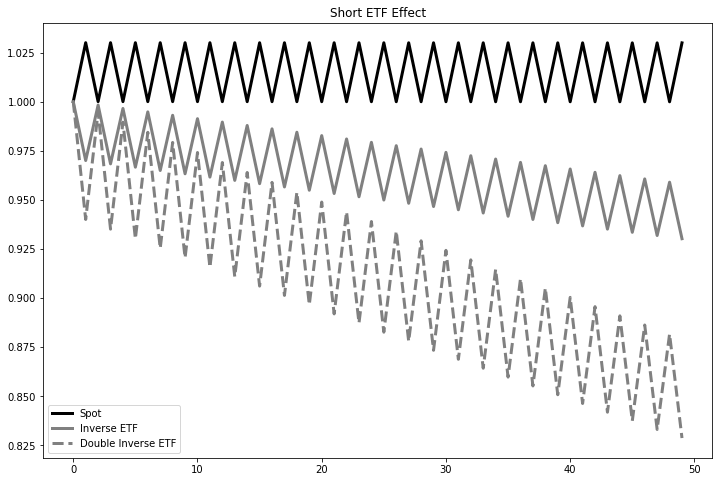

<IPython.core.display.Javascript object>

In [10]:
# Make  new figure and set the size.
fig = plt.figure(figsize=(12, 8))

# The first subplot, planning for 3 plots high, 1 plot wide, this being the first.
ax = fig.add_subplot(111)
ax.set_title("Short ETF Effect")
ax.plot(
    df["underlying_price"], linestyle="-", label="Spot", linewidth=3.0, color="black"
)
ax.plot(
    df["short_price"], linestyle="-", label="Inverse ETF", linewidth=3.0, color="grey"
)
ax.plot(
    df["double_short_price"],
    linestyle="--",
    label="Double Inverse ETF",
    linewidth=3.0,
    color="grey",
)
ax.legend()